# Student Performance Indicator

### Life-cycle of Machine Learning Project

  1. Understanding the problem statement
  2. Data collection
  3. Data checks to perform
  4. Exploratory Data Analysis
  5. Data Pre-processing
  6. Model Training
  7. Choose best model

## 1) Problem Statement
  This project understands how the students' performance (test scores) is affected by the other variables such as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
  - Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams 
  - The dataset consists of 8 columns and 1000 rows

### 2.1) Import data and required packages
Importing Pandas, NumPy, Matplotlib and Warnings libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV data as Pandas dataframe

In [2]:
df = pd.read_csv('data/student.csv')

Show top 5 records

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the Dataset

In [4]:
df.shape

(1000, 8)

## 2.2) Dataset Information
  - gender -> male/female
  - race/ethnicity -> group A, B, C, D, E
  - parental level of education -> bachelor's degeree, some college, master's degree, associate's degree, high school
  - lunch -> standard, free/reduced
  - test preparation course -> complete, not complete
  - math score
  - reading score
  - writing score

## Checks to perform
- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values of each feature
- Check statistics of dataset
- Check various categories present in different categorical columns

### 3.1) Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

### 3.2) Check duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

### 3.3) Check datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Checking the number of unique values in each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5) Check statistics of dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:

  - From above description of numerical data, all means are very close to each other - between 66.08 to 69.17
  - All the standard deviations are also close - between 14.6 to 15.19
  - Min score for math = 0, writing = 10, reading = 17

### 3.6) Exploring data

In [10]:
print("Categories in 'gender' variable:   ", end=' ')
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ", end=' ')
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ", end=' ')
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ", end=' ')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ", end=' ')
print(df['test preparation course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [11]:
# Define numerical and categoricl columns
numerical_features = [feature for feature  in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7) Adding columns for Total_Score and Average

In [12]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['average'].count()
maths_full = df[df['math score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

print(f'Number of students with full marks in reading = {reading_full}')
print(f'Number of students with full marks in maths = {maths_full}')
print(f'Number of students with full marks in writing = {writing_full}')

Number of students with full marks in reading = 17
Number of students with full marks in maths = 7
Number of students with full marks in writing = 14


In [14]:
reading_less_20 = df[df['reading score'] < 20]['average'].count()
writing_less_20 = df[df['writing score'] < 20]['average'].count()
math_less_20 = df[df['math score'] < 20]['average'].count()

print(f'Number of student with marks less than 20 in reading = {reading_less_20}')
print(f'Number of student with marks less than 20 in math = {math_less_20}')
print(f'Number of student with marks less than 20 in writing = {writing_less_20}')

Number of student with marks less than 20 in reading = 1
Number of student with marks less than 20 in math = 4
Number of student with marks less than 20 in writing = 3


Insights:
 - From the above values we get students have performed the worst in maths, best in reading

## 4) Exploring Data (Visualization)

### 4.1) Visualise average score distribution to make some conclusion
  - Histogram
  - Kernel Distribution Function(KDE)

4.1.1) Histogram and KDE

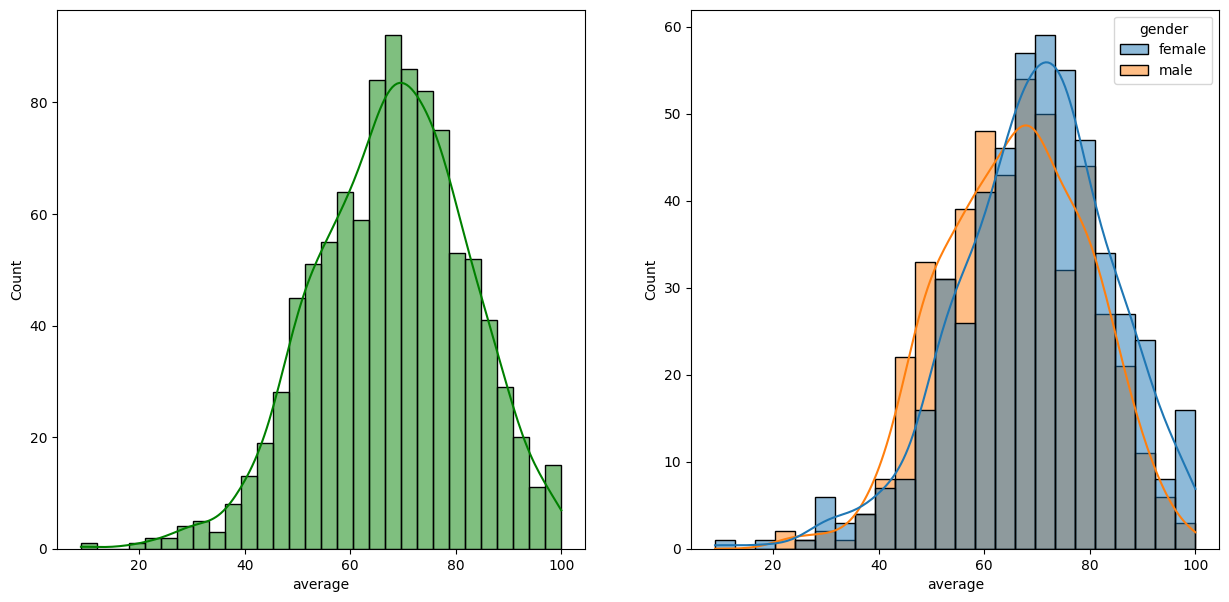

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

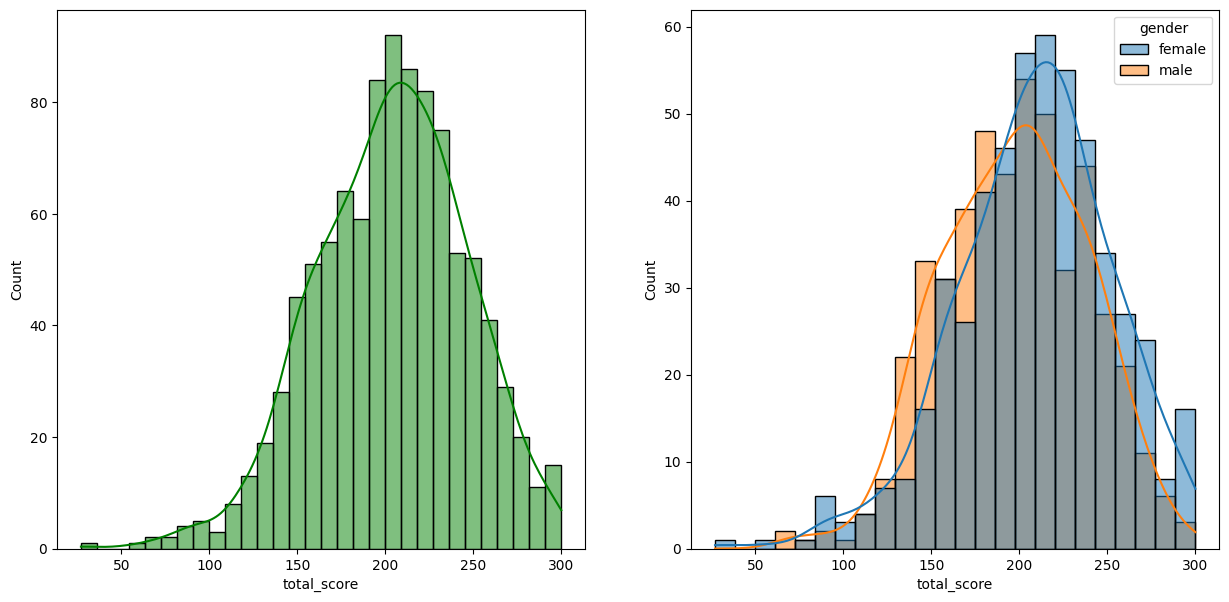

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

Insights:
 - Female students tend to perform better than male students

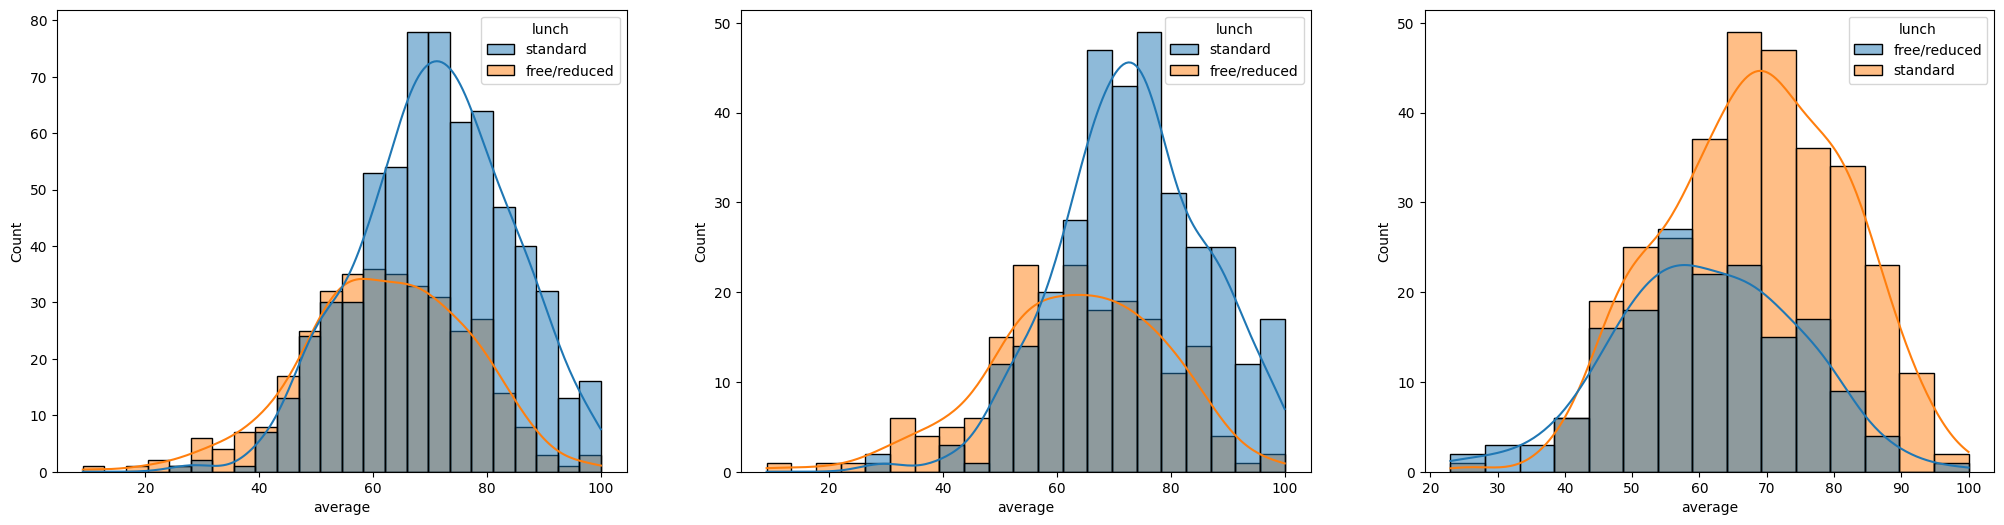

In [17]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
plt.show()